In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

CSV_PATH = r"E:\ASL_Citizen\ASL_Citizen_gloss_counts.csv"
df = pd.read_csv(CSV_PATH)

In [40]:
# Basic stats
total_videos = df["COUNT"].sum()
total_glosses = len(df)

print("Total videos:", total_videos)
print("Total unique glosses:", total_glosses)
print("Average videos per gloss:", round(df["COUNT"].mean(), 2))
print("Median videos per gloss:", df["COUNT"].median())
print("Max videos for a gloss:", df["COUNT"].max())
print("Min videos for a gloss:", df["COUNT"].min())

Total videos: 83399
Total unique glosses: 2091
Average videos per gloss: 39.88
Median videos per gloss: 31.0
Max videos for a gloss: 489
Min videos for a gloss: 28


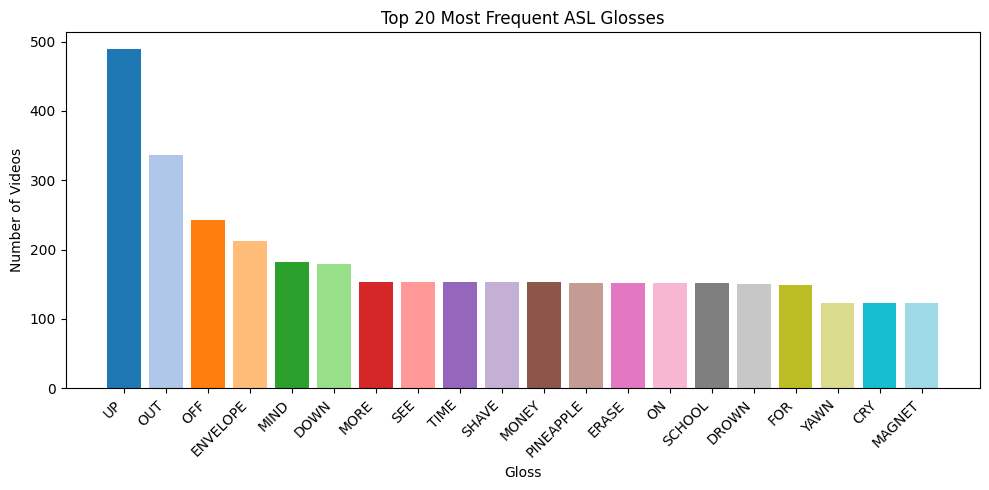

In [41]:
top_k = 20
top_df = df.sort_values("COUNT", ascending=False).head(top_k)
plt.figure(figsize=(10, 5))
plt.bar(top_df["GLOSS"], top_df["COUNT"], color=plt.cm.tab20.colors)
plt.xticks(rotation=45, ha="right")
plt.title(f"Top {top_k} Most Frequent ASL Glosses")
plt.xlabel("Gloss")
plt.ylabel("Number of Videos")
plt.tight_layout()
plt.show()


Glosses with <= 30 videos: 741
Rare-class video percentage: 26.52 %


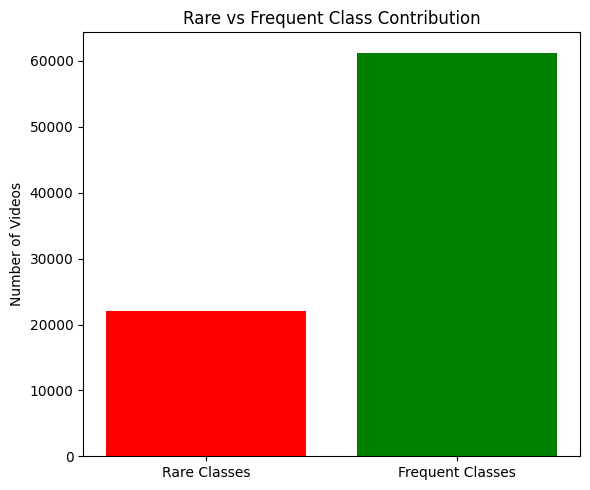

In [42]:
# =========================
# RARE CLASS ANALYSIS
# =========================
threshold = 30
rare_df = df[df["COUNT"] <= threshold]

print(f"\nGlosses with <= {threshold} videos:", len(rare_df))
print("Rare-class video percentage:",
      round(rare_df["COUNT"].sum() / total_videos * 100, 2), "%")

plt.figure(figsize=(6, 5))
plt.bar(["Rare Classes", "Frequent Classes"],
        [rare_df["COUNT"].sum(), total_videos - rare_df["COUNT"].sum()],color=['red', 'green'])
plt.title("Rare vs Frequent Class Contribution")
plt.ylabel("Number of Videos")
plt.tight_layout()
plt.show()